# More on the nitty-gritties of substructure matching:

In [27]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import rdmolops
from rdkit.Chem import rdmolfiles
from rdkit.Chem import rdMolDescriptors as rdmd
import pandas as pd
import numpy as np

import rdkit
print(f"I am RDKit version: {rdkit.__version__}")
import sys
print(f"I am python version {sys.version}")

I am RDKit version: 2023.09.5
I am python version 3.10.0 (default, Feb 27 2024, 12:29:18) [Clang 15.0.0 (clang-1500.1.0.2.5)]


### How atom counting and substructure matching happens:

#### Do not remove this example molecule!

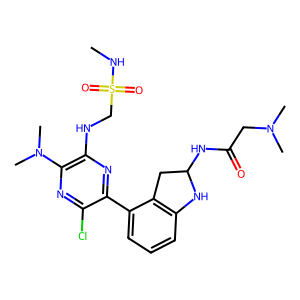

In [28]:
#molecule #1 from samples_V06
smiles = "c1(N(C)C)c(NCS(=O)(=O)NC)nc(c2cccc3c2CC(NC(=O)CN(C)C)N3)c(Cl)n1"
z = Chem.MolFromSmiles(smiles)
Draw.MolToImage(z)

### Some smarts notations and their meanings:

In [29]:
#give me all nitrogens with one hydrogen and valency of 3. Gives (5,), (10,), (22,), (29,)
#hbd = Chem.MolFromSmarts('[$([N;H1;v3])]') 

#give me all nitrogens with exactly 2 hydrogens attached. Gives none.
#hba = Chem.MolFromSmarts('[NH2]')

#Gives nitrogens with one hydrogen attached. Gives (5,), (10,), (22,), (29,). [NH] is same as [N;H2]
#hba = Chem.MolFromSmarts('[N;H1]')

#give me all nitrogens with exactly 2 carbons attached. Gives a few matches.
hba = Chem.MolFromSmarts('C[N;H0]C')

#give me all halogens. Gives (31,)
#hba = Chem.MolFromSmarts('[F,Cl,Br,I]')

#give me all nitrogens with zero hydrogens and valency of 3. Gives (1,), (26,). 
hbd = Chem.MolFromSmarts('[$([N;H0;v3])]') 

#give me all nitrogens that is not attached with zero hydrogens (means the N has to be attached to atleast 1 hydrogens) and has valency of 3. Gives (5,), (10,), (22,), (29,)
#hbd = Chem.MolFromSmarts('[$([N;!H0;v3])]') 

#give me all oxygens with or without hydrogens (they are acceptors). Gives (8,), (9,), (24,)
#hbd = Chem.MolFromSmarts('[$([O;H0;v2])]')

#give me all Sulphurs. Gives 7
#hba = Chem.MolFromSmarts('S')

#give me all nitrogens in aromatic rings. Gives 12, 32
#hba = Chem.MolFromSmarts('[n]')



hbds = z.GetSubstructMatches(hbd)
hbas = z.GetSubstructMatches(hba)

print(hbds,"\n")
print(hbas)


((1,), (26,)) 

((2, 1, 3), (25, 26, 27), (25, 26, 28), (27, 26, 28))


### How the atom counting is done for substructure matching:

The atoms are counted from one end of the molecule, and the count includes hydrogens

In the above example, the counting starts from top left, from the methyl group attached to the nitrogen.

In the methyl group, the carbon will be atom number 1, and the three hydrogens attached would be 2,3 and 4. The attached nitrogen will be atom number 5 and its hydrogen will be 6.

The attached sulphur will be 7 and the double bonded oxygens 8 and 9 (as reflected in the substructure match).

Hence, we can conclude that the counting starts from R6. But, is this true for all different types of structures?

### Let's look at another example:

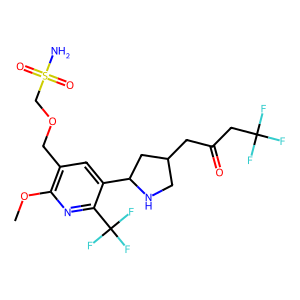

In [30]:
#molecule #2 from the samples_V06
#smiles = "c1(O)c(CCS(=O)(=O)N(C)C)nc(c2cc(NC(=O)CC(F)(F)F)cc(F)c2)n1(NC)"
smiles = "c1(OC)c(COCS(=O)(=O)N)cc(C2CC(CC(=O)CC(F)(F)F)CN2)c(C(F)(F)F)n1"
z = Chem.MolFromSmiles(smiles)
Draw.MolToImage(z)

Is the counting done again from R6? i.e whether from the bottom left or is it from bottom right?

In [31]:
#give me all nitrogens that is attached to a carbon and has valency of 3. Gives (8,), (16,), (29,)
hbd = Chem.MolFromSmarts('[$([N]-[C])]') 

#give me all oxygens with or without hydrogens (they are acceptors). Gives (6,), (7,), (18,)
#hbd = Chem.MolFromSmarts('[$([O;H0;v2])]')

#give me all Sulphurs. Gives 5
#hba = Chem.MolFromSmarts('[$([S])]')

#give me all Sulphurs. Gives (21,), (22,), (23,), (26,)
#hba = Chem.MolFromSmarts('[$([F])]')

#give me C that is attached to 3 fluorines. Gives (20,)
hba = Chem.MolFromSmarts('[$(C(F)(F)F)]')

hbds = z.GetSubstructMatches(hbd)
hbas = z.GetSubstructMatches(hba)

print(hbds,"\n")
print(hbas)

((25,),) 

((20,), (27,))


### Simple Example - 1 (To understand how the numbering is done)

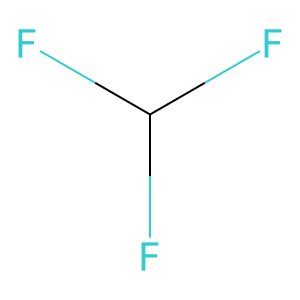

In [32]:
water = "C(F)(F)F"
z=Chem.MolFromSmiles(water)
Draw.MolToImage(z)

In [33]:
ele = Chem.MolFromSmarts('F') #gives (1,), (2,), (3,)
ele = Chem.MolFromSmarts('C') #gives (0,)
z.GetSubstructMatches(ele)

((0,),)

### Simple Example - 2 (To understand how the numbering is done)

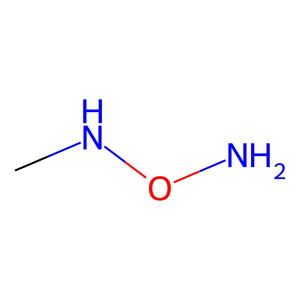

In [34]:
water = "CNON"
z=Chem.MolFromSmiles(water)
Draw.MolToImage(z)

In [35]:
ele = Chem.MolFromSmarts('N') #gives (1,), (3,)
ele = Chem.MolFromSmarts('O') #gives (2,)
ele = Chem.MolFromSmarts('C') #gives (0,)

z.GetSubstructMatches(ele)

((0,),)

### Simple Example - 3

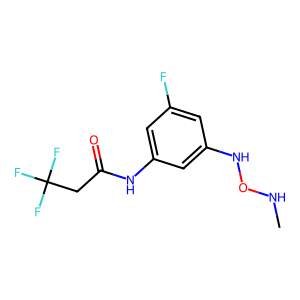

In [36]:
water = "CNONc2cc(NC(=O)CC(F)(F)F)cc(F)c2"
z=Chem.MolFromSmiles(water)
Draw.MolToImage(z)

#### Here, the counting seems to start from the right:

In [37]:
ele = Chem.MolFromSmarts('F') #gives (12,), (13,), (14,), (17,)
ele = Chem.MolFromSmarts('C') #gives (0,), (8,), (10,), (11,)
ele = Chem.MolFromSmarts('N') #gives (1,), (3,), (7,)
ele = Chem.MolFromSmarts('O') #gives (2,), (9,)

z.GetSubstructMatches(ele)

((2,), (9,))

In [38]:
b=5
a=0

while True:
    a=a+1
    print(a)
    
    if a==b:
        break

1
2
3
4
5


# Getting smarts from smiles:

In [39]:
smiles=Chem.MolFromSmiles('[*]C(F)(F)F')
sma = Chem.MolToSmarts(smiles)
print(sma)

[#0]-[#6](-[#9])(-[#9])-[#9]


# Substructure Searching:

### 1. Searching for one pattern in one main molecule:

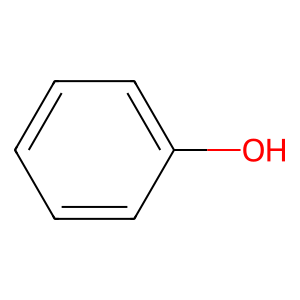

In [40]:
m = Chem.MolFromSmiles('c1ccccc1O') #this is the main molecule
Draw.MolToImage(m)

In [41]:
pattern = Chem.MolFromSmarts('ccO') #Search this pattern in the above main molecule

print(m.HasSubstructMatch(pattern)) #true or false

print(m.GetSubstructMatch(pattern)) # Gives 0,5,6. This means it matches ONE substructure with indices 0,5,6 in the main molecule

print(m.GetSubstructMatches(pattern)) #Gives all possible indices where the match occurs

print(len(m.GetSubstructMatches(pattern))) # get the count of all matches

True
(0, 5, 6)
((0, 5, 6), (4, 5, 6))
2


### 2. Searching for one pattern in multiple main molecules:

In [42]:
#These 3 are the main molecules:
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('[*]C=C=C[*]'), Chem.MolFromSmiles('COCN'), Chem.MolFromSmarts('[*]C#CC'), Chem.MolFromSmarts('[*]C[C][*]')]
print(ms)

[<rdkit.Chem.rdchem.Mol object at 0x141fe63b0>, <rdkit.Chem.rdchem.Mol object at 0x141fe6420>, <rdkit.Chem.rdchem.Mol object at 0x141fe6490>, <rdkit.Chem.rdchem.Mol object at 0x141fe6500>, <rdkit.Chem.rdchem.Mol object at 0x141fe6570>]


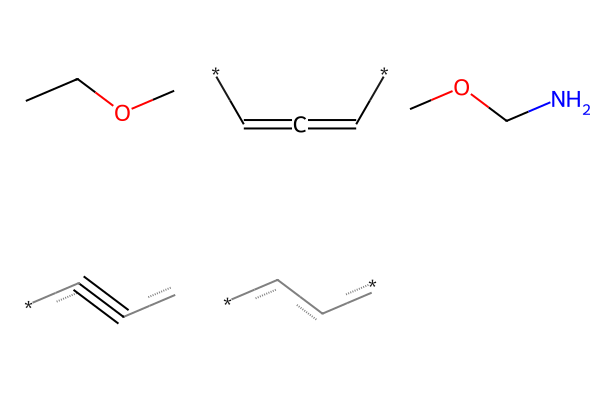

In [43]:
#Visualize them:
Draw.MolsToGridImage(ms)

In [44]:
pattern = Chem.MolFromSmarts('CO') #Search this pattern in the above main molecule

matches_mol = [] #create an empty list to store matched molecules
matches_index = [] #create an empty list to store indices of atoms of matched molecules

for mol in ms:
    if mol.HasSubstructMatch(pattern):
#        print(Chem.rdmolfiles.MolToCXSmiles(mol), mol.GetSubstructMatch(pattern)) #Print strcuture and indices respectively
        
        matches_mol.append(Chem.rdmolfiles.MolToCXSmiles(mol))
        matches_index.append(mol.GetSubstructMatch(pattern))
        
print(matches_mol)
print(matches_index)

['CCOC', 'COCN']
[(1, 2), (0, 1)]


### 3. Searching multiple patterns in multiple main molecules:

In [45]:
#Molecules to search from
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('[*]C=C=C[*]'), Chem.MolFromSmiles('COCN'), Chem.MolFromSmarts('[*]C#CC'), Chem.MolFromSmarts('[*]C[C][*]')]

#Patterns to search
ps = [Chem.MolFromSmarts('CO'), Chem.MolFromSmarts('CN'), Chem.MolFromSmarts('C#[*]'), Chem.MolFromSmarts('[*]#C'), Chem.MolFromSmarts('[*]CC[*]')]

for mol in ms:
    for pattern in ps:
        
        if mol.HasSubstructMatch(pattern):
            
            print("The pattern",Chem.rdmolfiles.MolToSmarts(pattern), "is in", Chem.rdmolfiles.MolToCXSmiles(mol), "at indices", mol.GetSubstructMatch(pattern)) #Print strcuture and indices respectively

The pattern CO is in CCOC at indices (1, 2)
The pattern CO is in COCN at indices (0, 1)
The pattern CN is in COCN at indices (2, 3)
The pattern C#* is in *C#CC at indices (1, 2)
The pattern *#C is in *C#CC at indices (1, 2)
The pattern *CC* is in *CC* at indices (0, 1, 2, 3)


### 4. Searching for multiple patterns in one molecule:

In [46]:
ms = Chem.MolFromSmarts('CCNC') #this molecule in which the presence of below patterns is to be checked

ps = [Chem.MolFromSmarts('[*]C[C][*]'), Chem.MolFromSmarts('[*]C[c][*]'),Chem.MolFromSmarts('[*]C[N][*]'),Chem.MolFromSmarts('[*]N[C][*]')]

for pattern in ps:
    if ms.HasSubstructMatch(pattern):
        print("Pattern", Chem.rdmolfiles.MolToSmarts(pattern),"is present")

Pattern *CN* is present
Pattern *NC* is present


### replace the list of above patterns (ps) with a dictionary:

In [47]:
from rdkit.Chem import Descriptors

#define the dictionary and corresponding G values
table = {
      "C[C]": 0.764,      #The first C is bound to 3 hydrogens
#      "[*]C[C]"
      "C[c]": 0.614,
      "C[N]": 0.610,
      "C[N]C": -1.401,
    }

def matching(smiles):
    ms = Chem.MolFromSmarts(smiles)
    log_p = 0

    for keys, values in table.items(): #keys are the patterns to match
    
        keys = Chem.MolFromSmarts(keys) #convert the keys in to mol object
    
        if ms.HasSubstructMatch(keys):
                
            count = len(ms.GetSubstructMatches(keys)) #how many matches?
            total_contribution = values * count # get the overall contribution for that group
        
            print("Pattern", Chem.rdmolfiles.MolToSmarts(keys),"is present")
            print("Value:",values)
            print("Count:",count)
            print("Total Contribution:",total_contribution)
            print("\n")
        
            log_p = log_p + total_contribution #Do the summation
    
    return log_p

smiles = '[*]CNC[*]'
log_p = matching(smiles)

print("Additive log_p:",log_p,"\n")

#Compare the above with Rdkit's calculated logP
m = Chem.MolFromSmiles(smiles)
print("Rdkit logP: ",Descriptors.MolLogP(m))

Pattern CN is present
Value: 0.61
Count: 2
Total Contribution: 1.22


Pattern CNC is present
Value: -1.401
Count: 1
Total Contribution: -1.401


Additive log_p: -0.18100000000000005 

Rdkit logP:  -0.4104000000000001


# Creating list of SMARTS for each G group

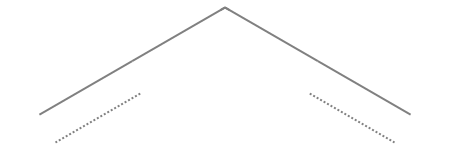

In [48]:
#To check if the smarts are correct
Chem.MolFromSmarts('C(C)C')

In [49]:
#Creating the dictionary:

g_table = {
#carbon groups:
    #bonded to one other group:
    "C[C]": 0.764,      #aliphatic carbon
    "C[c]": 0.614,
    "C[O]": 0.610,
    "C[N]": 0.610,
    "C[S]": 0.610,
    "C[CO]": 0.773,
    "C[CS]": 1.410,
    "C[SO]": 0.773,
    "C[S(O)O]": 0.773,
    #bonded to two other groups:
#    "C(C)C": 
    
#nitrogen groups:
    "C[N]C": -1.401,

#oxygen groups:
    
    
#sulphur groups:
    }

In [50]:
#define the dictionary and corresponding G values
solo_table = {
      "C[*]": 0.288,      #The * is any carbon
      "N[*]": -0.523,
      "O[*]": -0.327,
      "S[*]": 0.079,
      "F[*]": 0.144,
      "Cl[*]": 0.471,
      "H[*]": 0.040
    }

In [51]:
#Function to match each of the G groups to the smiles:

from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

#define the dictionary and corresponding G values
solo_table = {
      "[*]C[*]": 0.288,      #The * is any carbon
      "C[*]": 0.288,
      "[*]N[*]": -0.523,
      "[*]O[*]": -0.327,
      "O[*]": -0.327,
      "[*]S[*]": 0.079,
      "F[*]": 0.144,
      "Cl[*]": 0.471,
#      "H[*]": 0.040,
    }

def smarts_matching(smiles):
    
    ms = Chem.MolFromSmiles(smiles)
#    sma = Chem.MolToSmarts(smiles)
    
    add_H = Chem.AddHs(ms)
    h_count = add_H.GetNumAtoms() - add_H.GetNumHeavyAtoms() #get the total hydrogen atom count. Counts an extra from the actual number
    
    print("Hydrogen Count:", h_count,"\n") 
    h_contribution = h_count * 0.04 #0.04 is Gi contribution of a single H atom
    
    log_p = 0

    for keys, values in solo_table.items(): #keys are the patterns to match
    
        keys = Chem.MolFromSmarts(keys) #convert the keys in to mol object
    
        if ms.HasSubstructMatch(keys):
                
            count = len(ms.GetSubstructMatches(keys)) #how many matches?
            contribution = values * count # get the overall contribution for that group
                   
            print("Pattern", Chem.rdmolfiles.MolToSmarts(keys),"is present")
            print("Value:",values)
            print("Count:",count)
            print("Contribution:",contribution)
            print("\n")
        
            log_p = log_p + contribution #Do the summation
    
    return log_p

smiles = '[*:7]S(=O)(=O)C' #CCNC[*] is the original fragment
log_p = smarts_matching(smiles)

print("Additive log_p:",log_p,"\n")

#Compare the above with Rdkit's calculated logP
m = Chem.MolFromSmiles(smiles)
print("Rdkit logP: ",Descriptors.MolLogP(m))

Hydrogen Count: 4 

Pattern C* is present
Value: 0.288
Count: 1
Contribution: 0.288


Pattern *S* is present
Value: 0.079
Count: 1
Contribution: 0.079


Additive log_p: 0.367 

Rdkit logP:  -0.5046999999999999


In [52]:
smiles = Chem.MolFromSmiles("CCNC")

print(rdmolops.AddHs(smiles))

print(rdmolfiles.MolToSmiles(rdmolops.AddHs(smiles)))

[H]N(C([H])([H])[H])C([H])([H])C([H])([H])[H]
